In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**1. Carregando os Dados**

In [2]:
df = pd.read_excel(r'C:\Users\FAK\OneDrive\Documents\Atividade_ML\สถิติการจองห้องพัก (1).xlsx')


In [3]:
# Informações Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32494 entries, 0 to 32493
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           32494 non-null  datetime64[ns]
 1   province_thai  32494 non-null  object        
 2   province_eng   32494 non-null  object        
 3   region_thai    32494 non-null  object        
 4   region_eng     32494 non-null  object        
 5   variable       32494 non-null  object        
 6   value          32494 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.7+ MB


In [4]:
# Verificando se existe valores ausentes em alguma variavel
df.isnull().sum()

date             0
province_thai    0
province_eng     0
region_thai      0
region_eng       0
variable         0
value            0
dtype: int64

**2. Criando Variáveis Temporais**

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday # 0=monday, 1=tuesday, ..., 6=sunday

df['quarter'] = df['date'].dt.quarter # if there is seasonality per quarter or holiday

**3. Tratando Dados Categóricos**

In [6]:
encoder = LabelEncoder()
df['province_eng'] = encoder.fit_transform(df['province_eng'])
df['region_eng'] = encoder.fit_transform(df['region_eng'])

**4. Verificando se Existem Outliers**

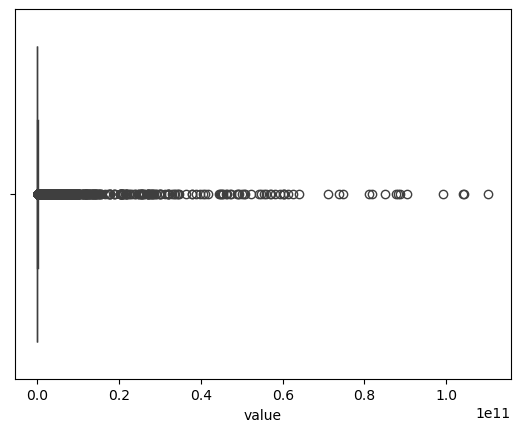

In [7]:
sns.boxplot(x = df['value'])
plt.show()

In [8]:
# Tratando os outliers
#Q1 = df['value'].quantile(0.25)
#Q3 = df['value'].quantile(0.75)
#IQR = Q3 - Q1
#limit_upper = Q1 - 1.5 * IQR
#limit_lower = Q3 + 1.5 * IQR

#df = df[(df['value'] >= limit_lower) & (df['value'] <= limit_upper)]

**5. Normalização**
Para modelos sensíveis a escalas como regressão linear ou redes neurais

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['value'] = scaler.fit_transform(df[['value']])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['value'] = scaler.fit_transform(df[['value']])

**6. Construindo Modelo de Regressão Linear**

In [11]:
# Importando o restante das bibliotecas que serão necessarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [ ]:
x = df[['year', 'month', 'province_eng']] # variaveis independentes (que devem ser utilizadas para prever)

y = df['value'] # variavel dependente (que será prevista)

**7. Dividindo os Dados em Treino e Teste**

20% serão para teste

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**8. Treinando o Modelo de Regressão Linear**

In [14]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

**9. Fazendo a Previsão**

In [15]:
y_pred = modelo.predict(x_test)

**10. Avaliando o Modelo**

In [16]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Erro Médio Absoluto (MAE): {mae}')
print(f'Raíz do Erro Quadrático Médio (RMSE): {rmse}')

Erro Médio Absoluto (MAE): 0.19834922448112616
Raíz do Erro Quadrático Médio (RMSE): 0.9847973505383355


c:\Users\FAK\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
